# **CAPSTONE PROJECT 3 - California Housing Price**

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

**Context**

This dataset pertains to housing prices in California, USA. It contains demographic information (households, income, population), housing location, and housing features (total rooms, bedrooms, house age) for each Census Block Group, which is the smallest census unit in the USA.

**Problem Statement**

One of the biggest challenges in real estate is estimating housing prices based on their features. If the price is set too low, the seller might not get the full value of the property, resulting in a financial loss. On the other hand, if the price is set too high, potential buyers might find it unaffordable or overpriced compared to similar properties, leading to a lack of interest and prolonged time on the market. Therefore, striking the right balance in pricing is essential to attract buyers while ensuring the seller receives a fair value for their property. This balance requires careful analysis and understanding of both the property's features and the current real estate market trends.

**Goals**

The purpose of this model is to predict house prices based on the features of California housing. The model analyzes various factors, including demographic information (such as the number of households, income levels, and population size), housing location, and specific housing features (like the total number of rooms, number of bedrooms, and the age of the house). By examining these variables, the model aims to provide accurate price estimates for properties within different Census Block Groups in California, helping sellers and buyers make informed decisions.

**Analytic Approach**

The data is analyzed to identify patterns in the available features, which distinguish one property from another. Subsequently, a regression model is built to serve as a tool for predicting the prices of newly listed houses. This model will be useful for real estate professionals to estimate property prices accurately, helping them make informed pricing decisions.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

- The dataset is from a census conducted in 1990.
- Each row represents information about individual properties in a Census Block Group.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | Property longitude coordinates |
| latitude | Float | Property longitude coordinates |
| housing_median_age | Float | Median age of housing in a census block group |
| total_rooms | Float | Number of rooms in a census block group |
| population | Float | Number of population |
| households | Float | Number of households |
| median_income | Float | Median income |
| ocean_proximity | Object | House location to ocean |
| median_house_value | Float | Median house price in a census block group |

<br>

In [1]:
# library for data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

## **1. Load Dataset**

In [2]:
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


## **2. Exploratory Data Analysis**

### **House Value Distribution**

Text(0.5, 1.0, 'House Value Distribution')

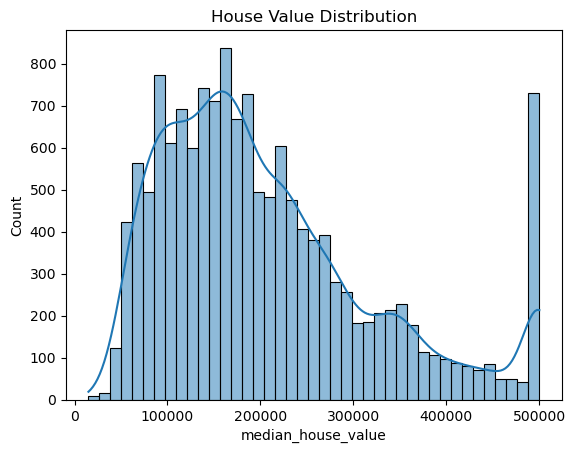

In [3]:
sns.histplot(data=df,x='median_house_value',kde=True);
plt.title('House Value Distribution')

> House Value distribution is right-skewed.

> There are many houses with high price from \$ 480,000  to \$ 500,000

### **Ocean Proximity Relation To Price**

In [4]:
# Check total house by its ocean proximity
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

In [5]:
# median of median house value by its ocean proximity
df_median = df.groupby('ocean_proximity')[['median_house_value']].median().sort_values(by='median_house_value', ascending=False).reset_index()
df_median

,ocean_proximity,median_house_value
0,ISLAND,351100.0
1,NEAR BAY,230800.0
2,NEAR OCEAN,228600.0
3,<1H OCEAN,214800.0
4,INLAND,108800.0


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

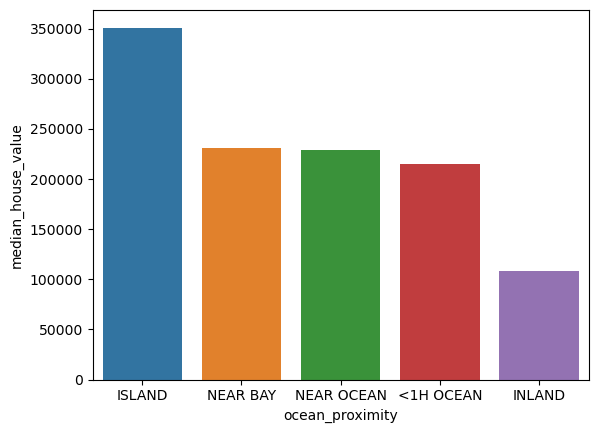

In [6]:
sns.barplot(data=df_median, x='ocean_proximity', y='median_house_value')

> Island: The median house value is the highest, at $351,100.

> Near Bay, Near Ocean, and Less Than 1 Hour to Ocean:

- The median house values in these categories are relatively close to each other, ranging from $214,800 to $230,800.

- This suggests that while there is a premium associated with being close to the ocean, the price difference between being near the bay and near the ocean or less than an hour from the ocean is not substantial.

> Inland: The median house value is the lowest, at $108,800.

- This indicates a significant drop in house values for properties located inland compared to coastal or near-coastal properties.

### **Location**

Text(0, 0.5, 'Latitude')

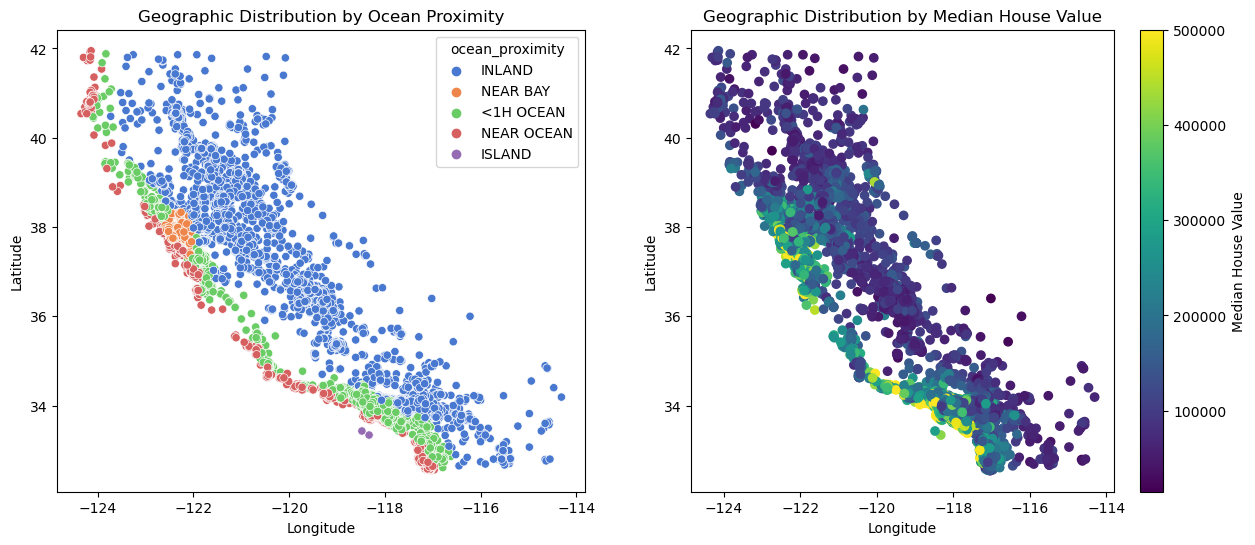

In [7]:
# Visualization housing price by ocean proximity

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Geographic Distribution by Ocean Proximity')
sns.scatterplot(data = df, x='longitude', y='latitude', hue='ocean_proximity', palette='muted'); # plot median per ocean proximity
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1,2,2)
plt.title('Geographic Distribution by Median House Value')
scatter = plt.scatter(x=df['longitude'], y=df['latitude'], c=df['median_house_value'], cmap='viridis');
colorbar = plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

> Properties near the ocean typically command higher prices, especially in the United States, due to several factors. The proximity to the ocean not only provides a scenic view but also offers a range of recreational activities that make these properties highly desirable.

> Many housings near ocean have high single median price, but in general they are ranked third by locations.

Text(0, 0.5, 'Median House Value')

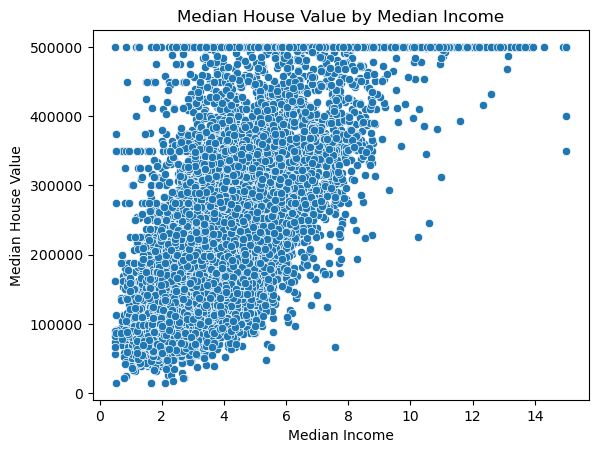

In [8]:
plt.title('Median House Value by Median Income')
sns.scatterplot(data = df, x = 'median_income', y = 'median_house_value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [9]:
df_prep = df.copy()

In [10]:
# check info on each features
list_features = []

for col in df_prep.columns:
    list_features.append([col, df_prep[col].dtype, df_prep[col].isna().sum(), round((df_prep[col].isna().sum()/len(df_prep[col]))*100, 2),
                    df_prep[col].nunique(), list(df_prep[col].drop_duplicates().sample(2).values)]);

df_prep_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=list_features)
df_prep_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-121.57, -121.66]"
1,latitude,float64,0,0.00,836,"[39.33, 41.06]"
2,housing_median_age,float64,0,0.00,52,"[12.0, 24.0]"
3,total_rooms,float64,0,0.00,5227,"[778.0, 3427.0]"
4,total_bedrooms,float64,137,0.95,1748,"[880.0, 2161.0]"
5,population,float64,0,0.00,3498,"[1235.0, 1332.0]"
6,households,float64,0,0.00,1649,"[513.0, 1348.0]"
7,median_income,float64,0,0.00,9797,"[2.9762, 4.0977]"
8,ocean_proximity,object,0,0.00,5,"[INLAND, NEAR BAY]"
9,median_house_value,float64,0,0.00,3548,"[375000.0, 235900.0]"


Dataset info shows there are 137 missing values on total_bedrooms column. These missing values are to be analyzed further on missing value analysis.

In [11]:
# check duplicated data
df_prep.duplicated().sum()

0

### **Drop Columns**

Some irrelevant features are dropped for prediction modeling.
- Based on Exploration Data Analysis, longitude and latitude data are already defined by ocean proximity. These columns are to be dropped from dataset.

In [12]:
# drop irrelevant columns
df_prep.drop(columns=['longitude','latitude'], inplace=True)

In [13]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  14448 non-null  float64
 1   total_rooms         14448 non-null  float64
 2   total_bedrooms      14311 non-null  float64
 3   population          14448 non-null  float64
 4   households          14448 non-null  float64
 5   median_income       14448 non-null  float64
 6   ocean_proximity     14448 non-null  object 
 7   median_house_value  14448 non-null  float64
dtypes: float64(7), object(1)
memory usage: 903.1+ KB


### **Missing Value**

In [14]:
# check total missing values
df_prep.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Only one feature has missing values. Since total bedrooms are essential to house's worth, further analysis is needed to uncover pattern of these missing values.

In [15]:
df_isna = df[df['total_bedrooms'].isna()]
df_isna.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0


In [16]:
num_features_isna = df_isna.drop(columns=['longitude','latitude','total_bedrooms']).describe().columns

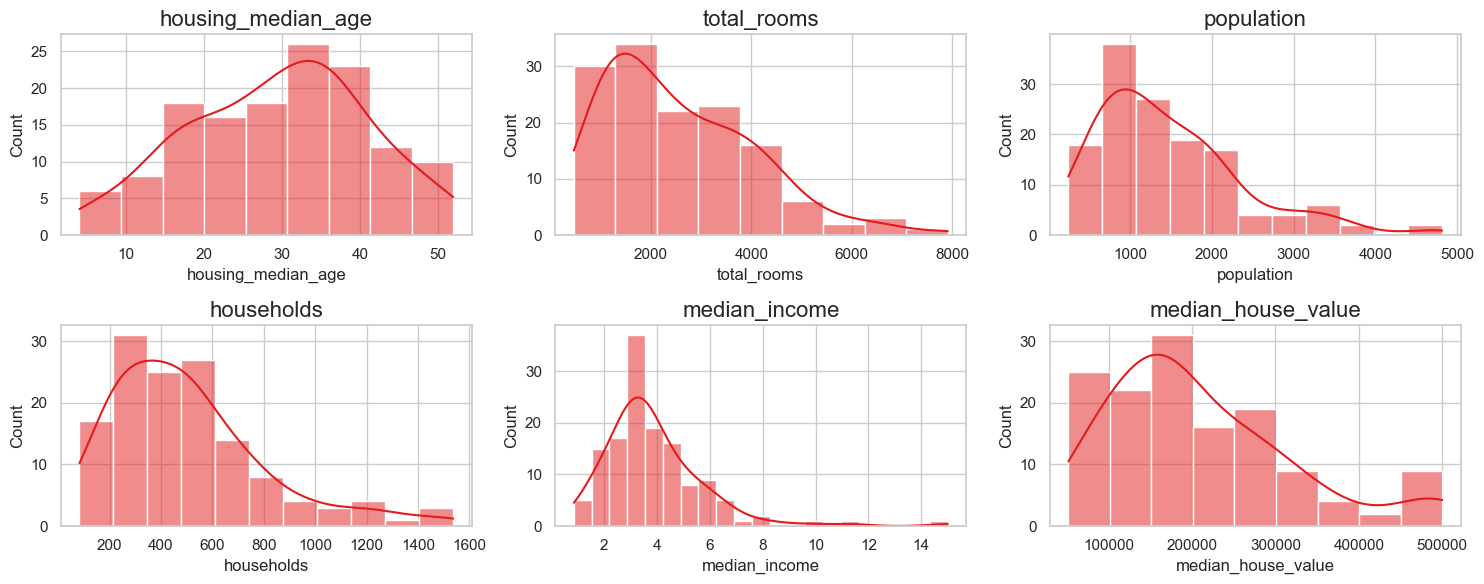

In [17]:
# missing total bedrooms data distribution from each features
plt.figure(figsize=(15,6), facecolor='white')
sns.set(style='whitegrid', palette='Set1')
plotnumber = 1

for feature in num_features_isna:
    ax = plt.subplot(2,3,plotnumber)
    sns.histplot(x=feature, data=df_isna.drop(columns=['longitude','latitude']), kde=True);
    plt.title(feature, size=16)
    plt.tight_layout()
    plotnumber += 1

plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

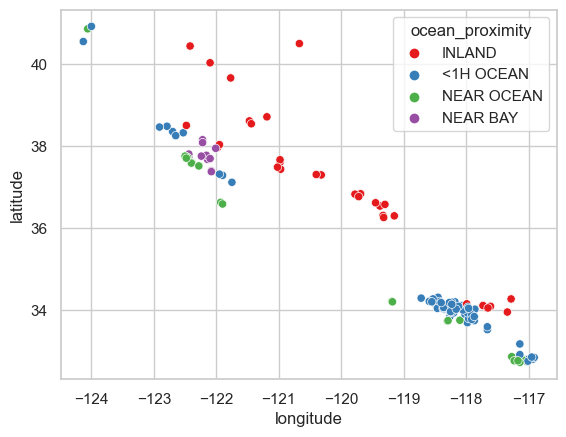

In [18]:
# missing total bedrooms data distribution by ocean proximity
sns.scatterplot(data=df_isna, x='longitude', y='latitude', hue='ocean_proximity')

Most houses with missing total bedroom data exhibit a right-skewed distribution in the dataset features. The majority of the missing data is from houses with low total rooms, population, households, median income, and median house value. It is possible that smaller to medium-sized houses might not need to be sold or are less desirable to buyers. Based on their location, the houses with missing bedroom data are not concentrated in any specific area.

> Missing total bedroom data is preprocessed for modeling to ensure the accuracy and robustness of predictive models. 

### **Correlation**

In [19]:
df_corr = df_prep.corr(numeric_only=True, method='spearman')
# .drop(columns=['longitude','latitude'], index=['longitude','latitude'])
df_corr

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.363420,-0.314208,-0.288264,-0.289847,-0.148067,0.072069
total_rooms,-0.363420,1.000000,0.916249,0.815582,0.907105,0.271127,0.199245
total_bedrooms,-0.314208,0.916249,1.000000,0.870014,0.975877,-0.002529,0.081704
population,-0.288264,0.815582,0.870014,1.000000,0.902576,0.005163,-0.001653
households,-0.289847,0.907105,0.975877,0.902576,1.000000,0.032316,0.108217
median_income,-0.148067,0.271127,-0.002529,0.005163,0.032316,1.000000,0.680296
median_house_value,0.072069,0.199245,0.081704,-0.001653,0.108217,0.680296,1.000000


<Axes: title={'center': 'Heatmap Correlation'}>

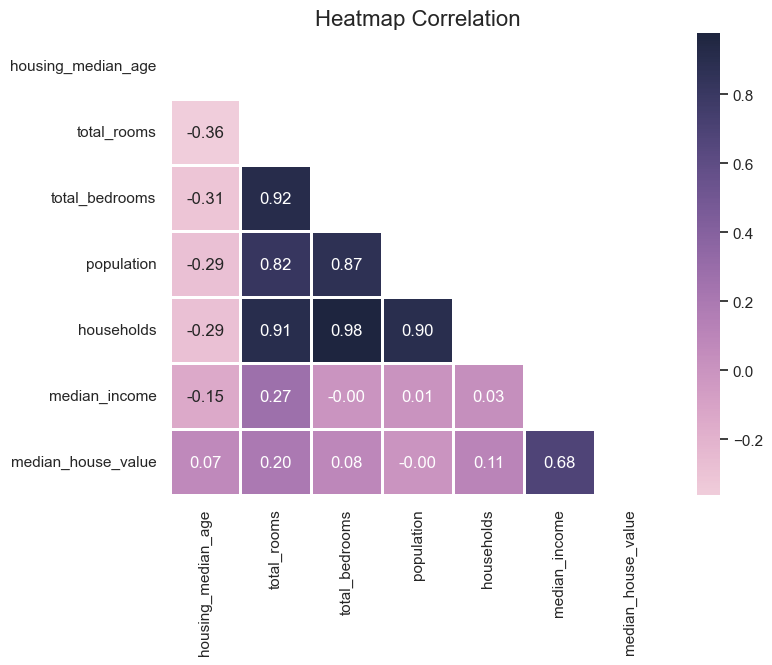

In [20]:
plt.figure(figsize=(8,6))
sns.set(style='white')
plt.title('Heatmap Correlation', size = 16)
sns.heatmap(data=df_corr,
            cmap = sns.cubehelix_palette(start = -0.3, as_cmap=True),
            linecolor = 'white',
            linewidths = 1,
            annot = True,
            mask=np.triu(df_corr),
            fmt = '.2f')

> There are several features with strong positive correlations:

- Total rooms vs. Total bedrooms
- Total rooms vs. Population
- Total rooms vs. Households
- Total bedrooms vs. Population
- Total bedrooms vs. Households
- Population vs. Households

> The Median Income feature has a medium positive correlation with Median House Value.

### **Outliers Detection**

In [21]:
num_features = df_prep.describe().columns

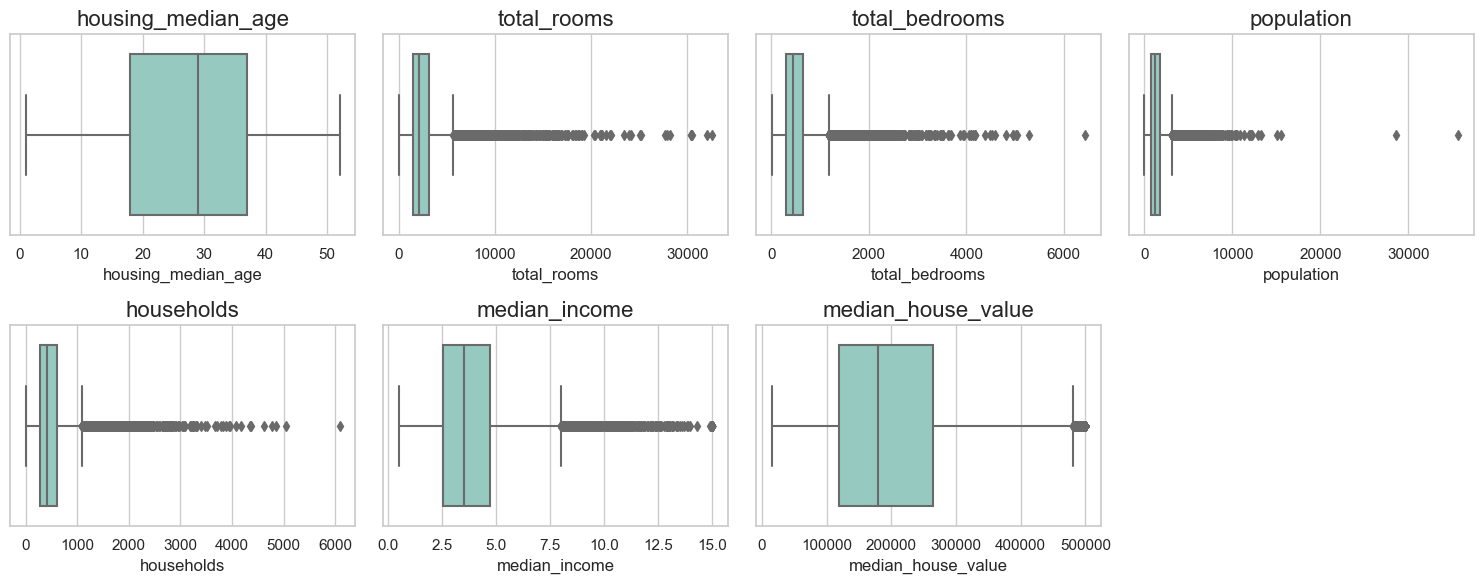

In [22]:
# missing total bedrooms data distribution from each features
plt.figure(figsize=(15,6), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_features:
    ax = plt.subplot(2,4,plotnumber)
    sns.boxplot(x=feature, data=df_prep);
    plt.title(feature, size=16)
    plt.tight_layout()
    plotnumber += 1

plt.show()

There are many outliers in several features. In this project, outliers are cleaned while keeping the number of data. This ensures that the machine learning model can predict new data accurately and machine learning model could learn more from data.

#### **Median House Value**
Previously there are lot of data which falls at the highest price range. The data is cleaned using Interquartile Range (IQR) method to minimize variance in data.

In [23]:
# define function to detect outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'lower_limit: {lower_limit}')
    print(f'upper_limit: {upper_limit}')    

In [24]:
# Check descriptive statistics median house value
df_prep['median_house_value'].describe()

count     14448.000000
mean     206824.624516
std      115365.476182
min       14999.000000
25%      119600.000000
50%      180000.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [25]:
# Outliers on median house value feature
find_anomalies(df_prep['median_house_value'])

IQR: 144300.0
lower_limit: -96850.0
upper_limit: 480350.0


In [26]:
# Check median house value > $ 480350
df_prep[df_prep['median_house_value'] > 480350].count()['median_house_value']

757

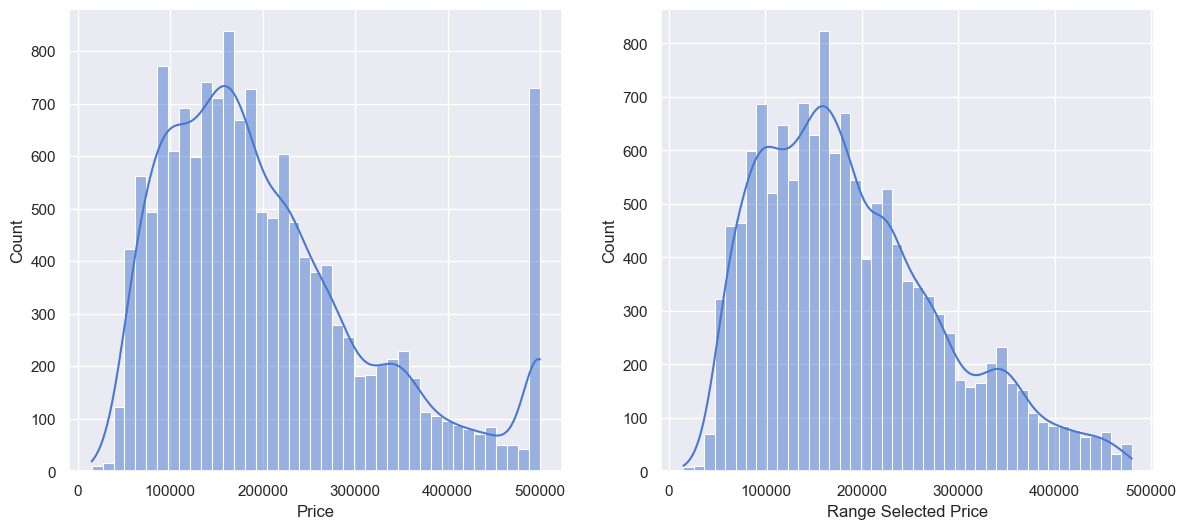

In [27]:
# median house value data filtering
df_prep = df_prep[(df_prep['median_house_value'] <= 480350)]

# Plot distribusi data sebelum dan sesudah filtering
sns.set(palette='muted')

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df['median_house_value'], kde=True)
plt.xlabel('Price')

plt.subplot(1,2,2)
sns.histplot(data=df_prep['median_house_value'], kde=True)
plt.xlabel('Range Selected Price');

#### **Population**

In [28]:
# Check descriptive statistics total rooms
df_prep['population'].describe()

count    13691.000000
mean      1442.138120
std       1162.249236
min          3.000000
25%        794.000000
50%       1182.000000
75%       1746.000000
max      35682.000000
Name: population, dtype: float64

In [29]:
# Check population > 10000
df_prep[df_prep['population'] > 10000].count()['population']

16

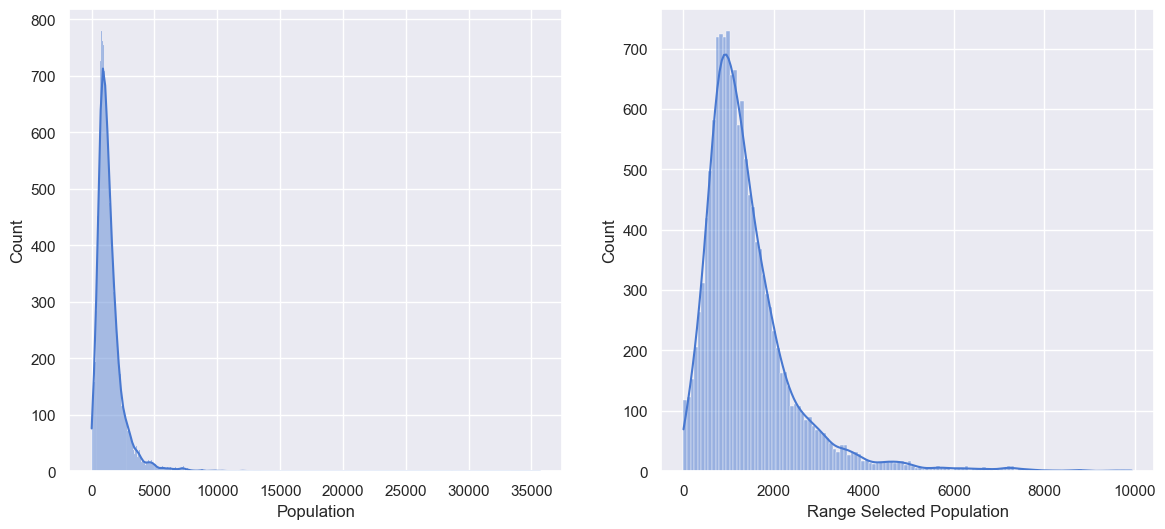

In [30]:
# population data filtering
df_prep = df_prep[(df_prep['population'] <= 10000)]

# Plot distribusi data sebelum dan sesudah filtering
sns.set(palette='muted')

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df['population'], kde=True)
plt.xlabel('Population')

plt.subplot(1,2,2)
sns.histplot(data=df_prep['population'], kde=True)
plt.xlabel('Range Selected Population');

#### **Total Rooms**

In [31]:
# Check descriptive statistics total rooms
df_prep['total_rooms'].describe()

count    13675.000000
mean      2596.120439
std       2045.042938
min          2.000000
25%       1438.000000
50%       2108.000000
75%       3118.500000
max      30450.000000
Name: total_rooms, dtype: float64

In [32]:
# Check total_rooms > 20000
df_prep[df_prep['total_rooms'] > 20000].count()['total_rooms']

9

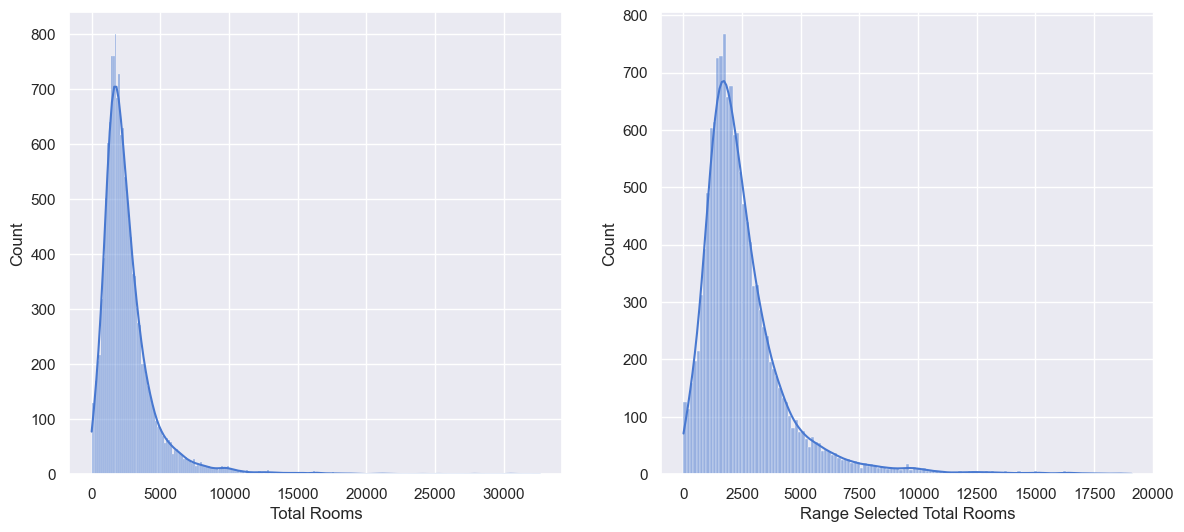

In [33]:
# total_rooms data filtering
df_prep = df_prep[(df_prep['total_rooms'] <= 20000)]

# Plot distribusi data sebelum dan sesudah filtering
sns.set(palette='muted')

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df['total_rooms'], kde=True)
plt.xlabel('Total Rooms')

plt.subplot(1,2,2)
sns.histplot(data=df_prep['total_rooms'], kde=True)
plt.xlabel('Range Selected Total Rooms');

#### **Total Bedrooms**

In [34]:
# Check descriptive statistics total bedrooms
df_prep['total_bedrooms'].describe()

count    13535.000000
mean       533.707573
std        395.557888
min          2.000000
25%        296.000000
50%        437.000000
75%        647.000000
max       4952.000000
Name: total_bedrooms, dtype: float64

In [35]:
# Check total_bedrooms > 4100
df_prep[df_prep['total_bedrooms'] > 4100].count()['total_bedrooms']

3

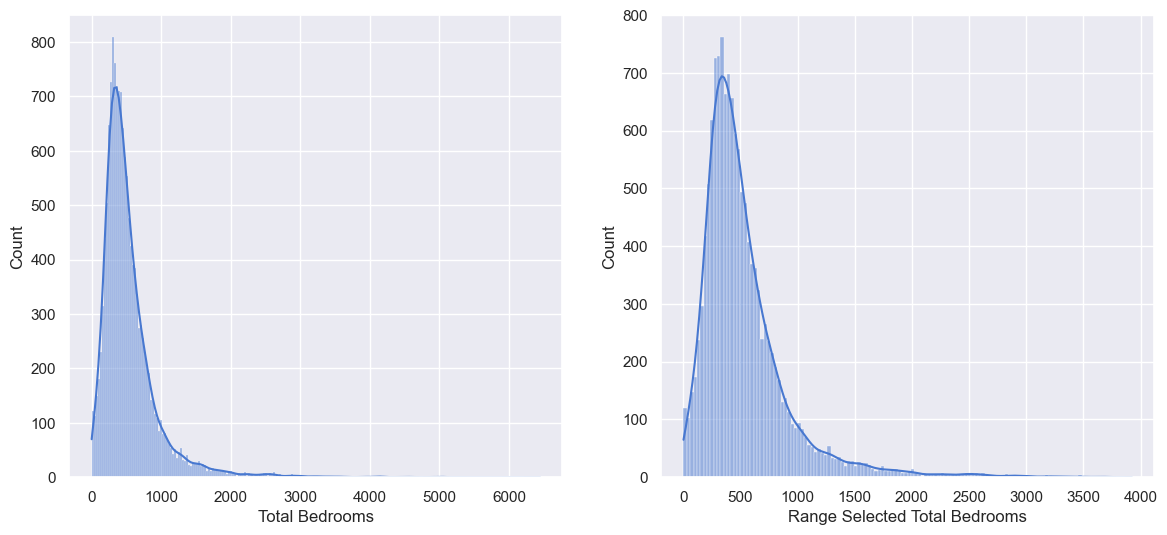

In [36]:
# total_bedrooms data filtering
df_prep = df_prep[(df_prep['total_bedrooms'] <= 4100)]

# Plot distribusi data sebelum dan sesudah filtering
sns.set(palette='muted')

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df['total_bedrooms'], kde=True)
plt.xlabel('Total Bedrooms')

plt.subplot(1,2,2)
sns.histplot(data=df_prep['total_bedrooms'], kde=True)
plt.xlabel('Range Selected Total Bedrooms');

#### **Households**

In [37]:
# Check descriptive statistics households
df_prep['households'].describe()

count    13532.000000
mean       494.633979
std        354.566004
min          2.000000
25%        280.000000
50%        411.000000
75%        604.000000
max       3522.000000
Name: households, dtype: float64

In [38]:
# Check households > 3600
df_prep[df_prep['households'] > 3600].count()['households']

0

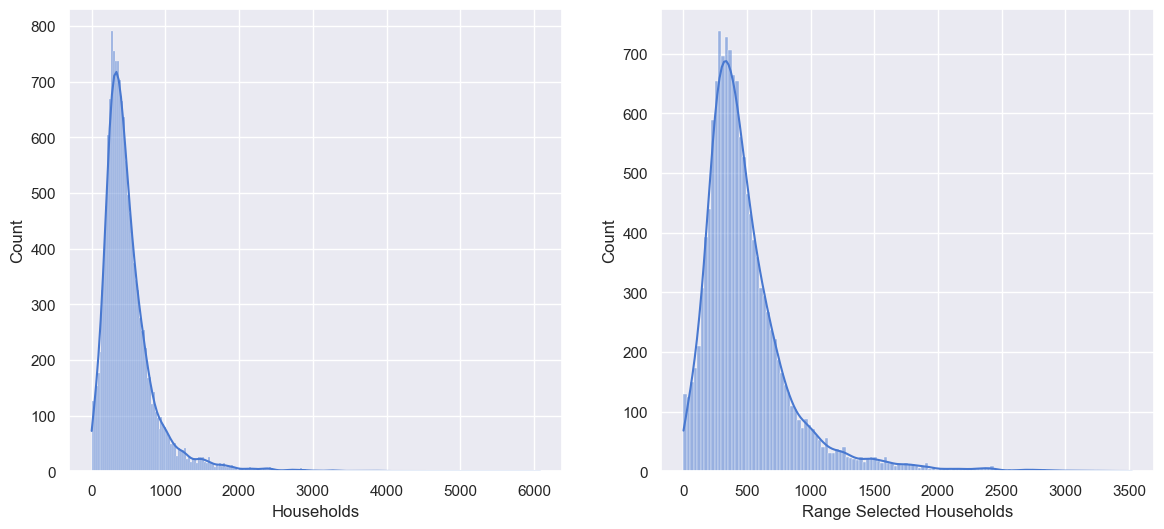

In [39]:
# households data filtering
df_prep = df_prep[(df_prep['households'] <= 3600)]

# Plot distribusi data sebelum dan sesudah filtering
sns.set(palette='muted')

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df['households'], kde=True)
plt.xlabel('Households')

plt.subplot(1,2,2)
sns.histplot(data=df_prep['households'], kde=True)
plt.xlabel('Range Selected Households');

In [40]:
print(len(df)-len(df_prep))
print(1-len(df_prep)/len(df))

916
0.0633997785160576


### **Clean Dataset**

In [41]:
# check dataset
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13532 entries, 0 to 14447
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  13532 non-null  float64
 1   total_rooms         13532 non-null  float64
 2   total_bedrooms      13532 non-null  float64
 3   population          13532 non-null  float64
 4   households          13532 non-null  float64
 5   median_income       13532 non-null  float64
 6   ocean_proximity     13532 non-null  object 
 7   median_house_value  13532 non-null  float64
dtypes: float64(7), object(1)
memory usage: 951.5+ KB


A total of 916 outliers (6.33% of the data) were cleaned using the Interquartile Range (IQR) and outlier method. Additionally, the previously mentioned missing values appear to be associated with these outliers. The dataset is checked again for missing values.

In [42]:
df_prep.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Since missing data is already cleaned, there is no need to impute the data.
Total of 13532 data is used in modeling.

## **Modeling**

In [43]:
# import library

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from category_encoders import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### **Define X and y**

The purpose of this model is to predict the median house value based on its features. X contains the features, while y contains the target.

In [44]:
df_prep.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity', 'median_house_value'],
      dtype='object')

In [45]:
X = df_prep[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity']]
X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND
1,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY
2,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN
3,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN
4,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND
...,...,...,...,...,...,...,...
14441,24.0,2927.0,704.0,2005.0,668.0,2.2375,NEAR OCEAN
14442,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND
14443,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND
14444,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND


In [46]:
y = df_prep['median_house_value']
y

0         47500.0
1        100000.0
2        285800.0
3        175000.0
4         59200.0
           ...   
14441    102900.0
14442     64300.0
14443    144600.0
14444    159400.0
14447     69400.0
Name: median_house_value, Length: 13532, dtype: float64

### **Preprocessing**

Numerical features are scaled since the range differs for each feature. Categorical features are encoded into numerical features so that machine learning models can predict more accurately. Through Exploratory Data Analysis, it is known that houses closer to the ocean have higher value. Therefore, ocean proximity is preprocessed using Ordinal Encoder.

In [47]:
mapping = [{
                'col':'ocean_proximity',
                'mapping':{'INLAND':1, '<1H OCEAN':2, 'NEAR OCEAN':3, 'NEAR BAY':4, 'ISLAND':5}
}]

In [48]:
# define pipeline
pipe_ord_robust = Pipeline(
    [
        ('ordinal', OrdinalEncoder(mapping=mapping, cols=['ocean_proximity'])),
        ('robust', RobustScaler())
    ]
)
pipe_ord_robust

Pipeline(steps=[('ordinal',
                 OrdinalEncoder(cols=['ocean_proximity'],
                                mapping=[{'col': 'ocean_proximity',
                                          'data_type': dtype('O'),
                                          'mapping': INLAND        1
<1H OCEAN     2
NEAR OCEAN    3
NEAR BAY      4
ISLAND        5
dtype: int64}])),
                ('robust', RobustScaler())])

In [49]:
# define column transformer

transformer = ColumnTransformer([
    ('pipe_ord_robust', pipe_ord_robust, ['ocean_proximity']),
    ('robust', RobustScaler(), ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])
    ], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_ord_robust',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['ocean_proximity'],
                                                                 mapping=[{'col': 'ocean_proximity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': INLAND        1
<1H OCEAN     2
NEAR OCEAN    3
NEAR BAY      4
ISLAND        5
dtype: int64}])),
                                                 ('robust', RobustScaler())]),
                                 ['ocean_proximity']),
                                ('robust', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income'])])

### **Data Splitting**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    test_size=0.2)

### **Cross Validation**

In [51]:
# Define algorithm
ridge = Ridge(random_state=0)
lasso = Lasso(random_state=0)
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
adaboost = AdaBoostRegressor(random_state=0)
gradient = GradientBoostingRegressor(random_state = 0)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_adaboost = TransformedTargetRegressor(adaboost, func=np.log, inverse_func=np.exp)
log_gradient = TransformedTargetRegressor(gradient, func=np.log, inverse_func=np.exp)
                                     
# define models
models = [log_ridge, log_lasso, log_lr, log_knn, log_dt, log_rf, log_xgb, log_adaboost, log_gradient]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Cross validation evaluation
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=0)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-73399.74194561 -71591.79818301 -82375.70783613 -70768.43614414
 -66369.90796586] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge(random_state=0))
[-49485.6761855  -48441.95120418 -50089.70874442 -48335.20608768
 -47124.64141111] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge(random_state=0))
[-0.28168926 -0.27324352 -0.28032036 -0.2769843  -0.28145023] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge(random_state=0))
[-99068.78634321 -97113.88261518 -97766.10463161 -98816.08117688
 -96461.98505537] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(random_state=0))
[-75381.60711965 -75105.25651683 -74623.66837573 -76293.00342448
 -74942.46821561] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc

In [52]:
# visualize to dataframe
pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'Adaboost Regressor', 'Gradient Boost'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Ridge,-72901.118415,5271.353397,-48695.436727,1022.730835,-0.278738,0.003220
1,Lasso,-97845.367964,989.357209,-75269.200730,567.653242,-0.481981,0.012840
2,Linear Regression,-72926.183740,5285.206521,-48698.788780,1023.551739,-0.278735,0.003217
3,KNN Regressor,-59781.132734,792.277011,-42166.080223,565.773916,-0.241289,0.004767
4,DecisionTree Regressor,-78116.868533,1985.938449,-55334.753164,1268.979613,-0.333629,0.011722
5,RandomForest Regressor,-56361.169532,894.328126,-39691.317732,495.699327,-0.228846,0.006183
6,XGBoost Regressor,-56813.910414,1016.087083,-40143.506621,598.144732,-0.231982,0.005356
7,Adaboost Regressor,-70037.555606,2488.689495,-50360.320699,1618.163234,-0.281057,0.005464
8,Gradient Boost,-57991.282118,762.555752,-41057.375316,439.052451,-0.234444,0.005751


The RandomForest Regressor has the lowest scores on Mean RMSE, Mean MAE, and Mean MAPE, with relatively low standard deviation. Based on cross-validation scoring, the RandomForest Regressor is selected for modeling.

### **Hyperparameter Tuning**

In [53]:
# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=0)

# hyperparams
hyperparam = {
    'modeling__criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'modeling__max_depth':range(2,20),
    'modeling__min_samples_split': range(20,100),
    'modeling__min_samples_leaf': range(20,100),
    'modeling__n_estimators':range(100,200,10)
}

# Membuat algorithm chains
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
randomsearch = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions= hyperparam,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_iter = 100,
    n_jobs = -1,
    refit = 'neg_mean_absolute_error',
    random_state=0
)
randomsearch

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_ord_robust',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(cols=['ocean_proximity'],
                                                                                                               mapping=[{'col': 'ocean_proximity',
                                                                                                                         'data_type': dtype('O'),
                                                                                                                         'mapping': INLAND        1
<1H OCEAN     2
NEAR OCEAN    3
NEAR...
                                                                'absolute_error',
                                                                'friedman_mse',
                                                                'poisson'],
                                        'modeling__max_depth': range(2, 20),
                                        'modeling__min_samples_leaf': range(20, 100),
                                        'modeling__min_samples_split': range(20, 100),
                                        'modeling__n_estimators': range(100, 200, 10)},
                   random_state=0, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [54]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_ord_robust',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(cols=['ocean_proximity'],
                                                                                                               mapping=[{'col': 'ocean_proximity',
                                                                                                                         'data_type': dtype('O'),
                                                                                                                         'mapping': INLAND        1
<1H OCEAN     2
NEAR OCEAN    3
NEAR...
                                                                'absolute_error',
                                                                'friedman_mse',
                                                                'poisson'],
                                        'modeling__max_depth': range(2, 20),
                                        'modeling__min_samples_leaf': range(20, 100),
                                        'modeling__min_samples_split': range(20, 100),
                                        'modeling__n_estimators': range(100, 200, 10)},
                   random_state=0, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [55]:
randomsearch.best_params_

{'modeling__n_estimators': 190,
 'modeling__min_samples_split': 51,
 'modeling__min_samples_leaf': 21,
 'modeling__max_depth': 12,
 'modeling__criterion': 'absolute_error'}

In [56]:
randomsearch.best_score_

-40490.88699647502

In [57]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(randomsearch.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__n_estimators,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_depth,param_modeling__criterion,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
73,10.201282,0.135790,0.087784,0.003232,150,56,29,15,poisson,"{'modeling__n_estimators': 150, 'modeling__min...",...,445.137178,6,-0.249407,-0.244119,-0.246163,-0.253923,-0.261348,-0.250992,0.006147,24
27,10.136895,0.126204,0.100569,0.002762,190,68,21,18,friedman_mse,"{'modeling__n_estimators': 190, 'modeling__min...",...,430.281511,8,-0.248852,-0.244384,-0.247052,-0.254800,-0.262298,-0.251477,0.006402,25
45,11.099749,0.050677,0.110848,0.005902,190,68,24,14,squared_error,"{'modeling__n_estimators': 190, 'modeling__min...",...,422.632033,12,-0.249412,-0.244853,-0.247421,-0.254828,-0.262377,-0.251778,0.006232,28
14,6.619491,0.151838,0.071104,0.003678,130,28,29,12,friedman_mse,"{'modeling__n_estimators': 130, 'modeling__min...",...,438.618381,11,-0.249287,-0.244629,-0.247081,-0.254999,-0.261714,-0.251542,0.006135,26
44,5.766915,0.025233,0.063843,0.005848,100,62,27,19,squared_error,"{'modeling__n_estimators': 100, 'modeling__min...",...,423.672997,10,-0.249087,-0.244733,-0.247039,-0.255104,-0.262378,-0.251668,0.006367,27


In [58]:
# Cek skor dan params terbaik
print('RandomForest')
print('Best_score:', randomsearch.best_score_)
print('Best_params:', randomsearch.best_params_)

RandomForest
Best_score: -40490.88699647502
Best_params: {'modeling__n_estimators': 190, 'modeling__min_samples_split': 51, 'modeling__min_samples_leaf': 21, 'modeling__max_depth': 12, 'modeling__criterion': 'absolute_error'}


### **Predict to Test Set**

Before Tuning

In [59]:
# define model
model = {'RF': RandomForestRegressor(random_state=0)}
rf = RandomForestRegressor(random_state=0)

# Membuat algorithm chains
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', rf)
        ])

# fit
pipe_model.fit(X_train,y_train)

# predict
y_pred_before = pipe_model.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))
mae_before = mean_absolute_error(y_test, y_pred_before)
mape_before = mean_absolute_percentage_error(y_test, y_pred_before)

score_before_tuning = pd.DataFrame({'RMSE': rmse_before, 'MAE': mae_before, 'MAPE': mape_before}, index=model.keys())
score_before_tuning

,RMSE,MAE,MAPE
RF,54925.851549,40135.561116,0.253551


After Tuning

In [60]:
# Model XGBoost
model = {'RF': RandomForestRegressor(random_state=0)}

# Define model terhadap estimator terbaik
rf_tuning = randomsearch.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_after = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))
mae_after = mean_absolute_error(y_test, y_pred_after)
mape_after = mean_absolute_percentage_error(y_test, y_pred_after)

score_after_tuning = pd.DataFrame({'RMSE': rmse_after, 'MAE': mae_after, 'MAPE': mape_after}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
RF,55650.105057,39551.813797,0.236407


### **Feature Importances**

In [61]:
importances = rf_tuning['modeling'].feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)
importances_df

,feature,importance
6,ocean_proximity,0.507587
0,housing_median_age,0.277628
1,total_rooms,0.059865
4,households,0.057237
3,population,0.044812
5,median_income,0.027503
2,total_bedrooms,0.025369


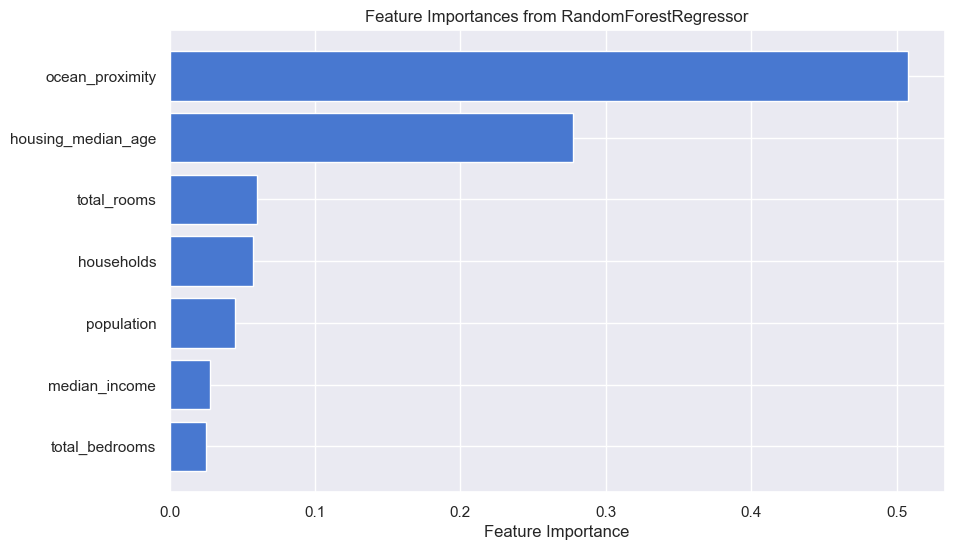

In [62]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'], importances_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForestRegressor')
plt.gca().invert_yaxis()
plt.show()

Feature importances from this modeling is as followed. Out of 7 features, two features (ocean_proximity and housing_median_age) account for 78% of the feature importance.

## **Residual Plot**

In [63]:
df_error_before = pd.DataFrame({
    'y_pred':y_pred_before,            
    'error': (y_test - y_pred_before)      
})

df_error_after = pd.DataFrame({
    'y_pred':y_pred_after,                
    'error': (y_test - y_pred_after)      
})

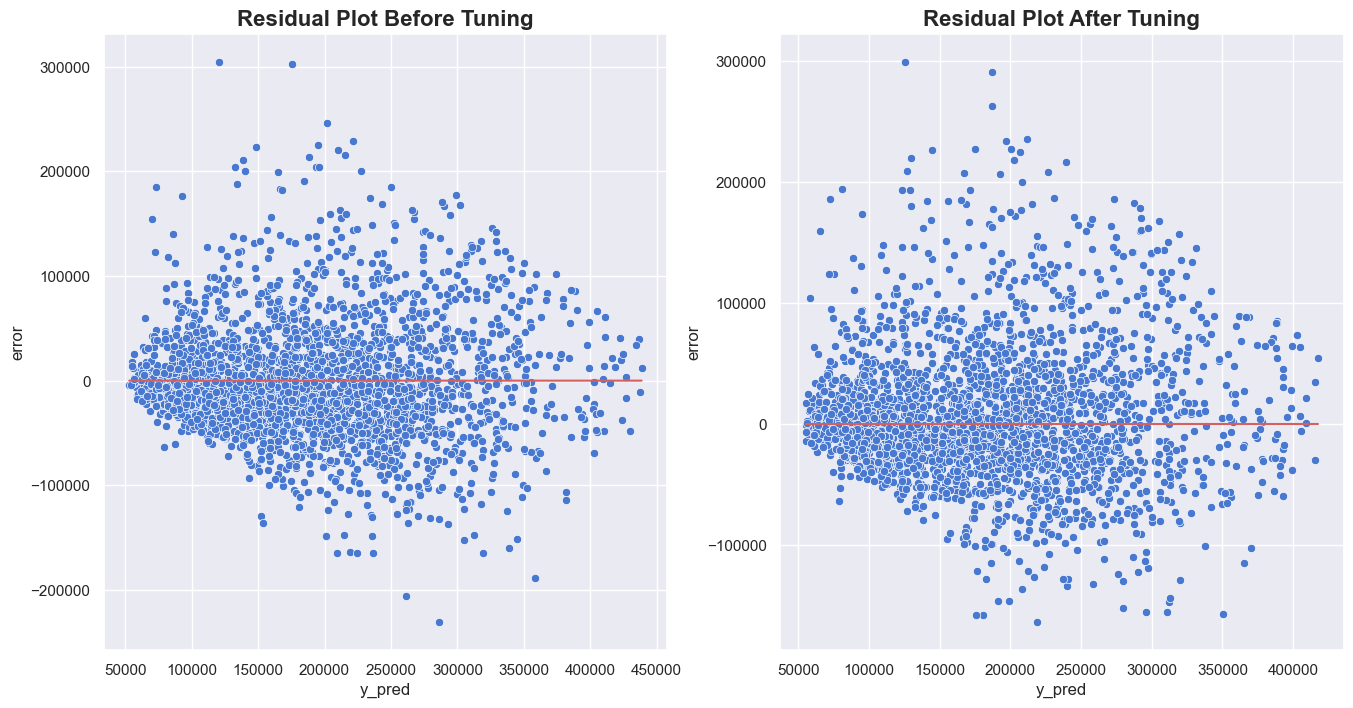

In [64]:
plt.figure(figsize = (16,8))
sns.set(palette='muted')
plt.subplot(1,2,1)
plt.title('Residual Plot Before Tuning', size=16, weight='bold')
sns.scatterplot(data=df_error_before, x='y_pred', y='error')
sns.lineplot(data=df_error_before, x='y_pred', y=0, color='r')

plt.subplot(1,2,2)
plt.title('Residual Plot After Tuning', size=16, weight='bold')
sns.scatterplot(data=df_error_after, x='y_pred', y='error')
sns.lineplot(data=df_error_after, x='y_pred', y=0, color='r');

## **Explainable AI**

In [65]:
import shap

In [66]:
rf_best = randomsearch.best_estimator_['modeling']

In [67]:
feature_names = randomsearch.best_estimator_['preprocessing'].get_feature_names_out()

In [68]:
pd.DataFrame(data = randomsearch.best_estimator_['preprocessing'].fit_transform(X_train), columns= randomsearch.best_estimator_['preprocessing'].get_feature_names_out())

,pipe_ord_robust__ocean_proximity,robust__housing_median_age,robust__total_rooms,robust__total_bedrooms,robust__population,robust__households,robust__median_income
0,-1.0,0.894737,-0.300300,-0.343840,-0.427061,-0.281250,-0.448301
1,0.0,0.578947,0.089489,0.263610,0.523256,0.362500,-0.187811
2,2.0,0.421053,-0.279279,-0.255014,0.218816,-0.221875,0.119866
3,0.0,-0.578947,0.942342,2.220630,1.544397,2.015625,-0.505843
4,-1.0,-1.157895,-1.212012,-1.197708,-1.172304,-1.212500,-0.160692
...,...,...,...,...,...,...,...
10820,0.0,-0.631579,0.886486,0.091691,0.346723,0.243750,2.341058
10821,0.0,0.368421,-0.790390,-0.805158,-0.714588,-0.768750,0.372418
10822,-1.0,0.263158,0.876276,1.318052,1.568710,1.515625,-0.573246
10823,1.0,-0.789474,0.474474,0.320917,0.007400,0.296875,1.269464


100%|===================| 10816/10825 [03:25<00:00]        

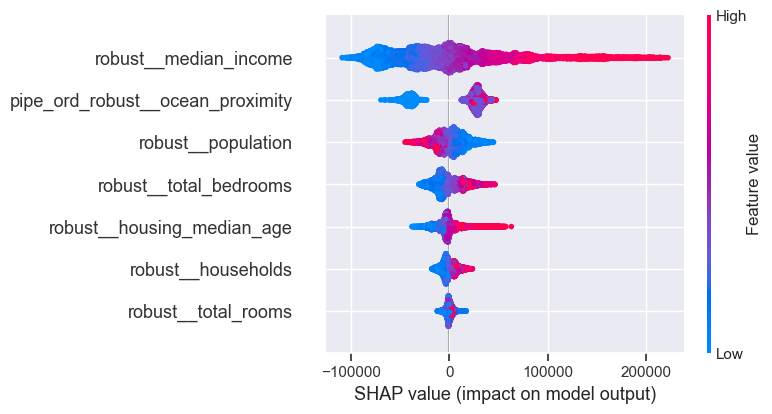

In [69]:
# define explainer
explainer = shap.TreeExplainer(
    rf_best,
    data = pd.DataFrame(data = randomsearch.best_estimator_['preprocessing'].fit_transform(X_train), columns= randomsearch.best_estimator_['preprocessing'].get_feature_names_out())  
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer.shap_values(randomsearch.best_estimator_['preprocessing'].fit_transform(X_train))

# tampilkan dalam bentuk plot                 
shap.summary_plot(shap_values, randomsearch.best_estimator_['preprocessing'].fit_transform(X_train), feature_names = feature_names)

In [70]:
shap_values

array([[-42507.91509056,   5257.77847912,   -132.11033283, ...,
          6586.90929488,  -3399.50638444, -51104.46502048],
       [ 31766.52236827,   5156.18695093,  -2016.37579433, ...,
        -11692.48181235,   8749.94532507, -22045.20617097],
       [ 24210.62678018,  -2863.0936516 ,  -2517.88483307, ...,
         -9774.49923088,  -5574.38486035,  -3759.95612556],
       ...,
       [-42392.63062729,   -596.59963264,    305.40863254, ...,
         -9200.74040465,   6480.35674615, -52002.78684413],
       [ 28497.44712088, -19206.96429072,   2833.10193529, ...,
          5947.60445373,   3476.04526391,  86135.36498688],
       [-39653.53402481,  -1951.41649463,   -228.49626545, ...,
         19716.1056112 ,  -3684.47511079, -64591.94453911]])

Based on Shapley Additive Explanations, several features significantly impact house value predictions:

1. **Income**: Higher population income correlates with higher house values. Among all features, income has the most significant impact on the target variable.

2. **Ocean Proximity**: Houses closer to the ocean tend to have higher values. However, houses that are not close to the ocean can also have high values, possibly because those near the Central Business District are in high demand.

3. **Population**: A smaller population in a census block group is associated with higher house values.

4. **Total Bedrooms**: More bedrooms generally correspond to higher house values.

5. **Housing Median Age**: Older houses tend to have higher values.

6. **Households**: A greater number of households correlates with higher house values, though this feature is less significant compared to others.

7. **Total Rooms**: This feature does not show a significant difference and is the least important in the prediction model.

## **Conclusion**

Based on the model, the features 'ocean_proximity' and 'housing_median_age' have the most significant influence on 'median_house_value'. The evaluation metrics used are RMSE, MAE, and MAPE. After tuning, the MAPE result is approximately 23%, which means that for a new house within the price range (maximum $480,350), the median house value prediction might deviate by 23% from the actual value.

There's still a chance that the prediction might deviate even more due to model bias. From the correlation heatmap, there are many features like total rooms, bedrooms, population, and households that are strongly correlated with the target variable.

This model can still be improved to produce better predictions. For example, we can conduct A/B testing on the current model to evaluate its effectiveness in increasing house sales. This can provide additional insights into what can be done to improve the model.

## **Recommendation**

    Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap lakunya listing jika dibandingkan dengan host yang menentukan harga sewa listingnya sendiri.

Some recommendations to improve model:

1. Examine each prediction with a high error rate. Group these errors into overestimation and underestimation categories with a 5% variance threshold. Identify if there are common patterns among these high-error data points. Use this analysis to inform further feature engineering and re-train the model accordingly.
<br><br>
2. Consider adding features such as kitchen facilities and basements, as these may be more strongly correlated with the target variable ('median_house_value'). Additionally, incorporating more data can improve the model's predictive capacity.
<br><br>
3. Separate houses with ocean proximity from the rest of the dataset. This differentiation is crucial as the model might not currently recognize the distinct differences between waterfront properties and downtown properties, both of which tend to have high median house values.
<br><br>

## **Save Model**

In [71]:
import pickle

In [72]:
# best model
rf_tuning = randomsearch.best_estimator_

# fit
rf_tuning.fit(X, y)

# save with pickle
pickle.dump(rf_tuning, open('model_rf.sav', 'wb'))